# Gaussian Fitting
This recipe shows how to use [`astropy`](<inv:astropy:std:doc#index>) and [`specutils`](<inv:specutils:std:doc#index>) to fit a Gaussian line profile to a
[Spectrum](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum).
The data comes from the [calseq tutorial](https://dysh.readthedocs.io/en/latest/tutorials/examples/calseq.html).


## Loading Modules
We start by loading the modules we will use for the data reduction. 

For display purposes, we use the static (non-interactive) `matplotlib` backend in this tutorial. However, you can tell `matplotlib` to use the `ipympl` backend to enable interactive plots. This is only needed if working on jupyter lab or notebook.

In [1]:
# These are the modules we will use for loading the data and fitting.
from dysh.spectra import Spectrum
from specutils.fitting import fit_lines
from astropy.modeling import models
from astropy import units as u
from dysh.log import init_logging

# These modules are used for file I/O
from dysh.util.files import dysh_data
from pathlib import Path

## Setup
We start the dysh logging, so we get more information about what is happening.
This is only needed if working on a notebook.
If using the CLI through the ``dysh`` command, then logging is setup for you.

In [2]:
init_logging(2)

# also create a local "output" directory where temporary notebook files can be stored.
output_dir = Path.cwd() / "output"
output_dir.mkdir(exist_ok=True)

## Data Retrieval

Download the example FITS spectrum, if necessary.

In [3]:
filename = dysh_data(example="nod-W/outputs/M82_ifnum_3_polavg.fits")

## Data Loading

We use 
[Spectrum.read](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.read)
to load the spectrum.

In [4]:
spec = Spectrum.read(filename, format="fits")

The loaded spectrum is now a 
[Spectrum](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum),
with all its methods.
We can plot it, using 
[plot](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.plot).

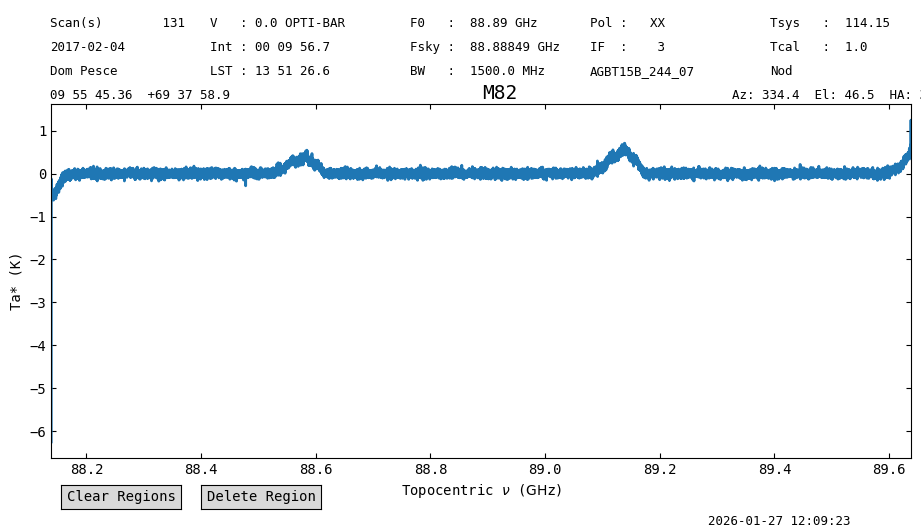

In [5]:
sp_plt = spec.plot(xaxis_unit="GHz")

Before fitting, lets remove the edges of the spectrum.
We only keep channels between 88.2 and 89.5 GHz.

In [6]:
spec = spec[88.2*u.GHz:89.5*u.GHz]

Plot again.

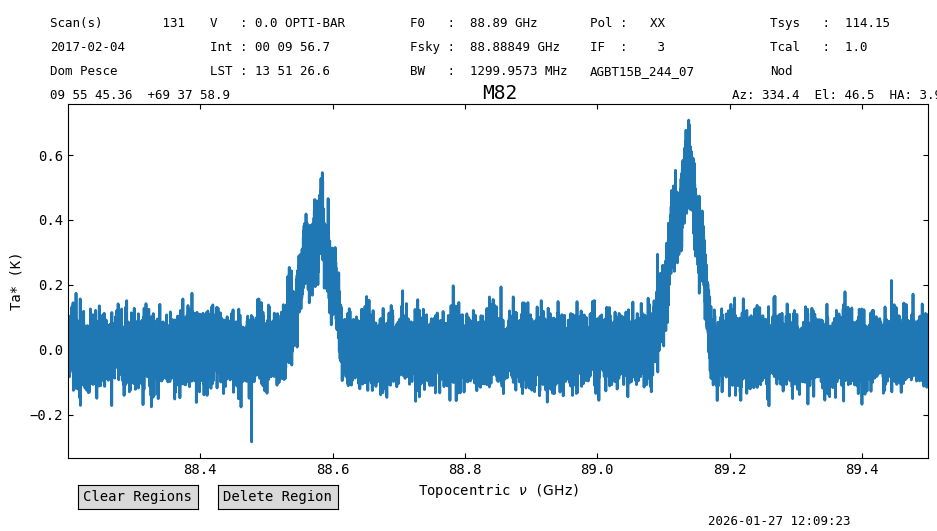

In [7]:
spec_plt = spec.plot(xaxis_unit="GHz")

Now we are ready to start fitting.

## Gaussian Fitting

Here we show how to fit a Gaussian profile using [`astropy`](<inv:astropy:std:doc#index>) and [`specutils`](<inv:specutils:std:doc#index>).
There are other options available, but we won't cover them all.

### Fitting a Single Gaussian

We start fitting a single Gaussian line profile to the line on the left, at about 88.55 GHz.
We create a model, with starting values, and then use the [`specutils.fitting.fit_lines`](https://specutils.readthedocs.io/en/stable/api/specutils.fitting.fit_lines.html#specutils.fitting.fit_lines) function to fit the model to the spectrum.
After the fit is done, we evaluate the best fit model over the spectral axis of the spectrum so we can plot it on top of the data.

In [8]:
g_init = models.Gaussian1D(amplitude=0.5*u.K, mean=88.55*u.GHz, stddev=0.1*u.GHz)
g_fit = fit_lines(spec, g_init)
y_fit = g_fit(spec.spectral_axis)

Now plot it.
We assign a "group id" (gid), so we can remove the line after.

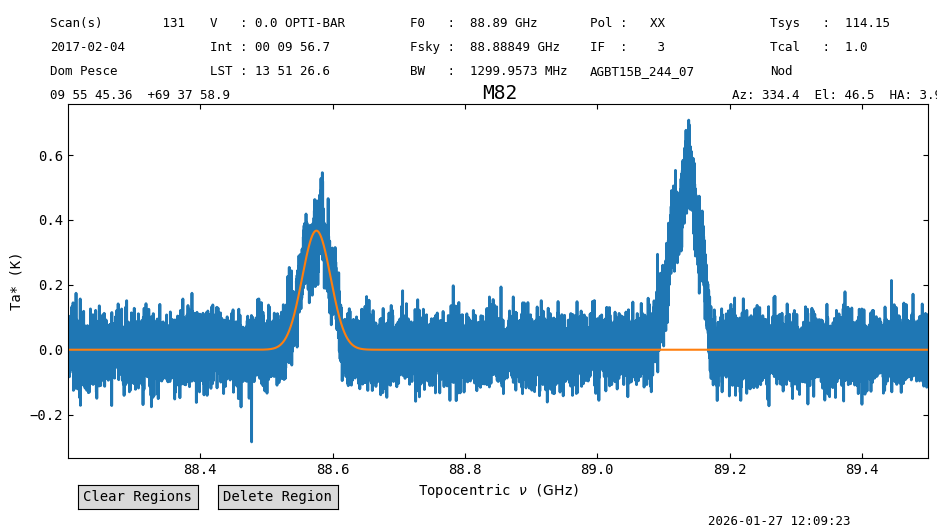

In [9]:
spec_plt.axis.plot(spec.spectral_axis.to("GHz"), y_fit, gid="1gauss")
spec_plt.figure # This will show the figure here.

#### Extracting Best Fit Parameters

The best fit parameters are now properties of the output best fit model.
We can access them through the parameter names, for the Gaussian, amplitude, mean and stddev.
For example, the line amplitude

In [10]:
g_fit.amplitude

Parameter('amplitude', value=0.3670704696308813, unit=K)

and its formal error

In [11]:
g_fit.amplitude.std

0.006236258674343533

#### Fitting Two Gaussians

We can also combine models.
In this case, we add a second Gaussian line profile to fit the second line at about 89.15 GHz.

In [12]:
g_init2 = models.Gaussian1D(amplitude=0.6*u.K, mean=89.15*u.GHz, stddev=0.1*u.GHz)
g_fit = fit_lines(spec, g_init + g_init2)
y_fit = g_fit(spec.spectral_axis)

Before plotting the new model with two Gaussians, we remove the previous line.

In [13]:
spec_plt.clear_lines("1gauss")

We repeat the plotting with the new model results.
This time, we add a label to the best fit model line (`label="best fit"`).

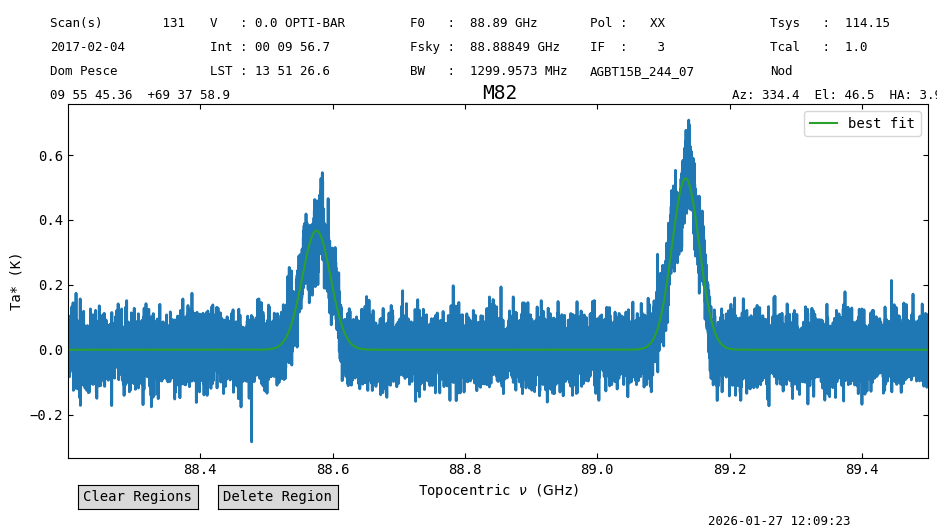

In [14]:
spec_plt.axis.plot(spec.spectral_axis.to("GHz"), y_fit, label="best fit")
spec_plt.axis.legend()
spec_plt.figure

You can find more examples of how to use [``specutils.fitting.fit_lines``](https://specutils.readthedocs.io/en/stable/api/specutils.fitting.fit_lines.html#specutils.fitting.fit_lines) in the [`specutils` documentation](https://specutils.readthedocs.io/en/stable/fitting.html).

In the case of a compound model, the model parameters get assigned an underscore and a number to differentiate them.
So the amplitude of the first Gaussian is stored in `g_fit.amplitude_0` and that of the second Gaussian in `g_fit.amplitude_1`

In [15]:
g_fit.amplitude_0

Parameter('amplitude', value=0.3670705202212676, unit=K)

In [16]:
g_fit.amplitude_1

Parameter('amplitude', value=0.5281505181498451, unit=K)

#### Other Profiles and Further Examples
Additional profiles and models are available through the [`astropy.modeling` submodule](https://docs.astropy.org/en/stable/modeling/predef_models1D.html).

The [`astropy`](<inv:astropy:std:doc#index>) documentation also provides examples of how to [fit models with constraints](https://docs.astropy.org/en/stable/modeling/example-fitting-constraints.html), and [examples of how to fit models](https://docs.astropy.org/en/stable/modeling/fitting.html), without using `specutils`.



## Final Stats

Finally, at the end we compute a fairly meaningless statistic over the whole spectrum, merely as a checksum if the notebook produces the same answer as when it was designed.

In [17]:
spec.stats() # rms 0.11606252 

12:09:24.822 I Note: found 27 NaN (masked) values


{'mean': <Quantity 0.03565473 K>,
 'median': <Quantity 0.00945847 K>,
 'rms': <Quantity 0.11606252 K>,
 'min': <Quantity -0.28415943 K>,
 'max': <Quantity 0.70788561 K>,
 'npt': 14199,
 'nan': 27}